In [2]:
# Importe
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Ziel:
Auswertung: Sichtungsdauer pro Form

In [3]:
# UFO Datensatz
path = r"C:\Users\Admin\Desktop\07 Python für Datenanalysten\Projekt_UFO\Nadja\ufo_sightings_scrubbed_clean (1).csv"
ufo_df = pd.read_csv(path)

In [4]:
# Anzeige der Spaltennamen
ufo_df.columns

Index(['datetime', 'city', 'state', 'country', 'shape', 'duration_seconds',
       'duration_hour_min', 'comments', 'date_posted', 'latitude',
       'longitude'],
      dtype='object')

In [5]:
## Sichtungsdauer je Form analysieren

# Vorbereitung
# Spalte "Shape" in Strings formatieren 

print(ufo_df['shape'].dtype)
shape_string = ufo_df.iloc[:, 5].astype("string")
shape_string

object


0        2700
1        7200
2          20
3          20
4         900
         ... 
80327     600
80328    1200
80329    1200
80330       5
80331    1020
Name: duration_seconds, Length: 80332, dtype: string

In [6]:
# Umwandlung der Dauer der Sichtung in Minuten
'''def convert_duration_hour_to_seconds(duration):
    if "h" in duration:
        hours, minutes = map(int, duration.split("h"))
        return hours * 3600 + minutes * 60
    elif "m" in duration:
        return int(duration.replace("m", '')) * 60
    else:
        return int(duration)'''

'def convert_duration_hour_to_seconds(duration):\n    if "h" in duration:\n        hours, minutes = map(int, duration.split("h"))\n        return hours * 3600 + minutes * 60\n    elif "m" in duration:\n        return int(duration.replace("m", \'\')) * 60\n    else:\n        return int(duration)'

In [7]:
# Überprüfen, welcher Datentyp in Spalte duration_seconds
print(ufo_df['duration_seconds'].dtype)

int64


In [8]:
# Gruppierung der Sichtungsform und Berechnung der durchschn. Dauer
average_duration = ufo_df.groupby("shape")["duration_seconds"].mean().reset_index()

# Sortierung nach duration_seconds
average_duration_sorted = average_duration.sort_values(by="duration_seconds", ascending=False)

average_duration_sorted

,shape,duration_seconds
5,cone,82827.405063
25,sphere,21789.972526
20,other,20634.406798
6,crescent,18905.000000
19,light,13171.928705
28,unknown,5546.935709
16,flash,5330.363705
4,circle,4767.865668
14,fireball,4024.099549
21,oval,3898.600054


<function matplotlib.pyplot.show(close=None, block=None)>

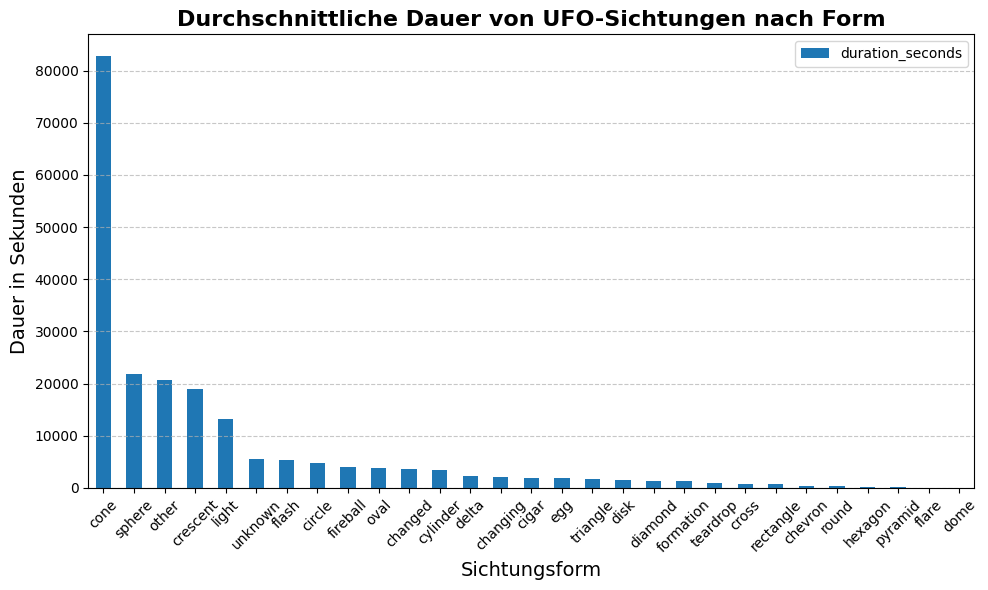

In [9]:
# Plot erstellen -- Durchschnittliche Dauer von UFO-Sichtungen nach Form
average_duration_sorted.plot(
    kind= "bar",        # Diagrammtyp
    figsize= (10, 6),     # Größe des Diagrammes festlegen
    x= "shape",             # x-Achse
    y= "duration_seconds"
)



plt.title("Durchschnittliche Dauer von UFO-Sichtungen nach Form", fontsize=16, fontweight='bold')  # Titel anpassen
plt.xlabel("Sichtungsform", fontsize=14)               # x-Achsen-Beschriftung anpassen
plt.ylabel("Dauer in Sekunden", fontsize=14)  # y-Achsen-Beschriftung anpassen
plt.xticks(rotation=45)                         # Drehen der Beschriftung
plt.tight_layout()                              # Optimiert das Layout
plt.grid(axis='y', linestyle='--', alpha=0.7)   # Gitterlinien für die y-Achse
plt.gca().xaxis.grid(False)                     # Deaktiviert Gitternetzlinien auf der x-Achse


# Diagramm anzeigen
plt.show

In [10]:
'''# Plot erstellen -- Durchschnittliche Dauer von UFO-Sichtungen nach Form
average_duration_sorted.plot(
    kind= "pie",            # Diagrammtyp
    y= "duration_seconds",   # Werte für das Diagramm
    labels= average_duration["shape"],  # Labels für die Segmente
    figsize= (5, 5),                # Größe des Diagr.
    legend= False
)



plt.title("Durchschnittliche Dauer von UFO-Sichtungen nach Form", fontsize=16, fontweight='bold')  # Titel anpassen


# Diagramm anzeigen
plt.show'''

'# Plot erstellen -- Durchschnittliche Dauer von UFO-Sichtungen nach Form\naverage_duration_sorted.plot(\n    kind= "pie",            # Diagrammtyp\n    y= "duration_seconds",   # Werte für das Diagramm\n    labels= average_duration["shape"],  # Labels für die Segmente\n    figsize= (5, 5),                # Größe des Diagr.\n    legend= False\n)\n\n\n\nplt.title("Durchschnittliche Dauer von UFO-Sichtungen nach Form", fontsize=16, fontweight=\'bold\')  # Titel anpassen\n\n\n# Diagramm anzeigen\nplt.show'

In [11]:
# Dauer der Sichtung je Form in Summe

# Aggregiere die Dauer in Sekunden je Form
duration_by_shape = ufo_df.groupby('shape')['duration_seconds'].sum().reset_index()

# Sortierung nach duration_seconds
average_duration_sorted_sum = duration_by_shape.sort_values(by="duration_seconds", ascending=False)

average_duration_sorted_sum

,shape,duration_seconds
19,light,218192999
25,sphere,117382582
20,other,116563764
4,circle,36273922
28,unknown,30974089
5,cone,26173460
14,fireball,24981610
21,oval,14553474
27,triangle,13111103
11,disk,7613956


C:\Users\Admin\AppData\Local\Temp\ipykernel_12260\475769630.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=duration_by_shape, x='shape', y='duration_seconds', palette='viridis')


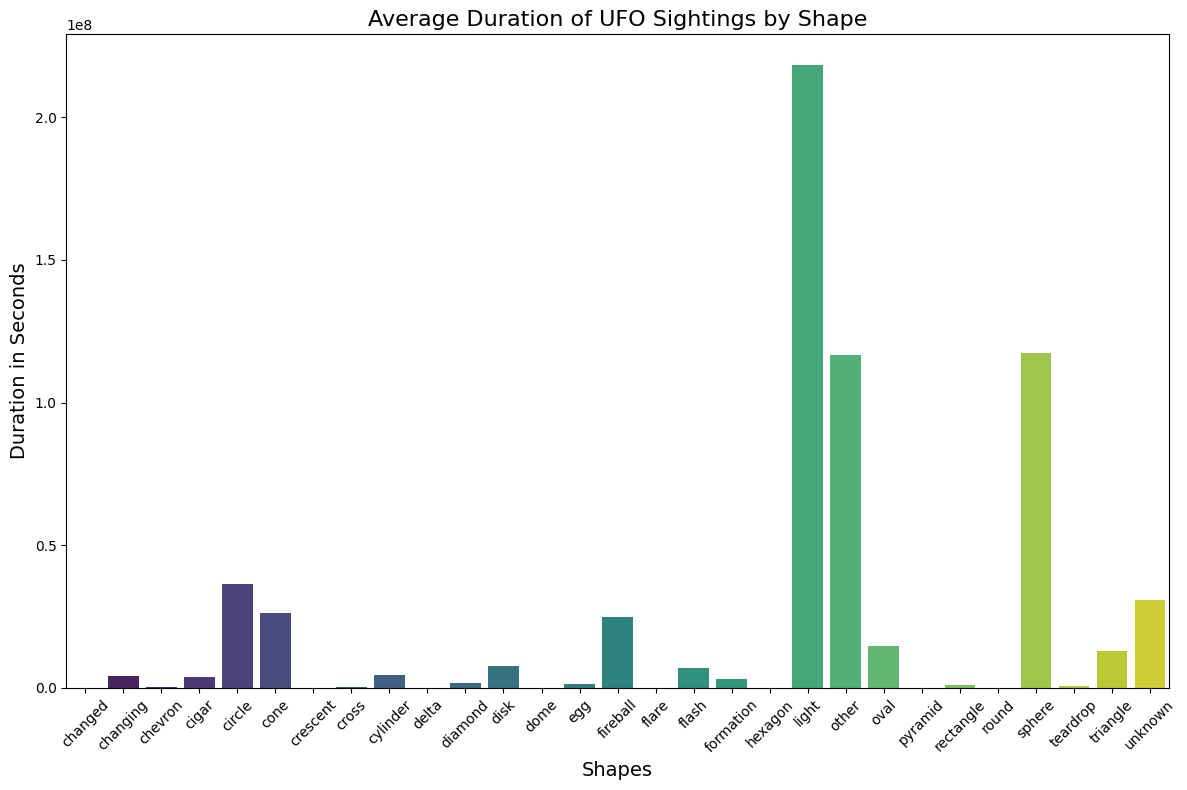

In [12]:
duration_by_shape = pd.DataFrame(duration_by_shape)

# Balkendiagramm erstellen
plt.figure(figsize=(12, 8))
sns.barplot(data=duration_by_shape, x='shape', y='duration_seconds', palette='viridis')

# Diagrammtitel und Achsenbeschriftungen
plt.title("Average Duration of UFO Sightings by Shape", fontsize=16)
plt.xlabel("Shapes", fontsize=14)
plt.ylabel("Duration in Seconds", fontsize=14)

# Achsenanpassungen
plt.xticks(rotation=45)
plt.tight_layout()

# Diagramm anzeigen
plt.show()


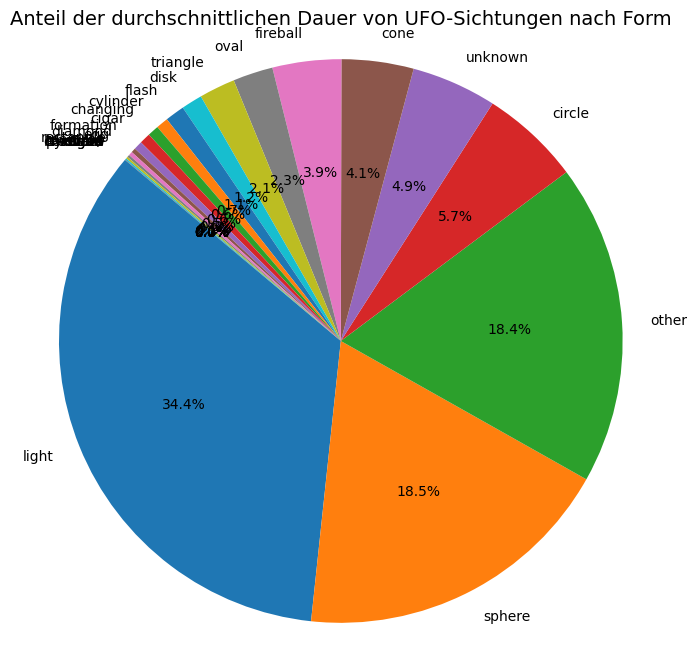

In [13]:
# Plot erstellen -- Anteil der durchschnittlichen Dauer von UFO-Sichtungen nach Form
duration_by_shape = pd.DataFrame(average_duration_sorted_sum)

# Kreisdiagramm erstellen
plt.figure(figsize=(8, 8))
plt.pie(duration_by_shape['duration_seconds'], 
        labels=duration_by_shape['shape'], 
        autopct='%1.1f%%', 
        startangle=140)
        #colors=plt.cm.viridis(range(len(duration_by_shape))))

# Diagrammtitel
plt.title("Anteil der durchschnittlichen Dauer von UFO-Sichtungen nach Form", fontsize=14)

# Diagramm anzeigen
plt.axis('equal')               # Gleichmäßige Achsen für einen perfekten Kreis
plt.show()